## Importing Required Libraries

In [123]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## Constants

In [148]:

NUM_CLASSES = 6


CHANNELS = 3

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 1

## Access and prepare data for training

In [ ]:
ROOT_PATH='/content/drive/MyDrive/Tasarım Çalışması Dataset/Tooth Decay Dataset/'
CLASSES={
    0:"Calculus",
    1:"Caries",
    2:"Gingivits",
    3:"Mouth Ulcer",
    4:"Tooth Discoloration",
    5:"Hypodontia"

}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
calculus_data_path="Calculus/Calculus/"
caries_data_path="Data caries/Data caries/caries augmented data set/preview/"
gingivitis_data_path="Gingivitis/Gingivitis/"
mouth_ulcer_data_path="Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/"
tooth_discoloration_data_path='Tooth Discoloration/Tooth Discoloration/Tooth_discoloration_augmented_dataser/preview/'
hypodontia_data_path="hypodontia/hypodontia/"

In [ ]:
calculus_data=os.listdir(ROOT_PATH+calculus_data_path)
caries_data=os.listdir(ROOT_PATH+caries_data_path)
gingivits_data=os.listdir(ROOT_PATH+gingivitis_data_path)
mouth_ulcer_data=os.listdir(ROOT_PATH+mouth_ulcer_data_path)
tooth_discoloration_data=os.listdir(ROOT_PATH+tooth_discoloration_data_path)
hypodontia_data=os.listdir(ROOT_PATH+hypodontia_data_path)

In [ ]:
for i in range(len(calculus_data)):
  calculus_data[i]=ROOT_PATH+calculus_data_path+calculus_data[i]

In [ ]:
for i in range(len(caries_data)):
  caries_data[i]=ROOT_PATH+caries_data_path+caries_data[i]

In [ ]:
for i in range(len(mouth_ulcer_data)):
  mouth_ulcer_data[i]=ROOT_PATH+mouth_ulcer_data_path+mouth_ulcer_data[i]

In [ ]:
for i in range(len(tooth_discoloration_data)):
  tooth_discoloration_data[i]=ROOT_PATH+tooth_discoloration_data_path+tooth_discoloration_data[i]

In [ ]:
for i in range(len(hypodontia_data)):
  hypodontia_data[i]=ROOT_PATH+hypodontia_data_path+hypodontia_data[i]

In [ ]:
for i in range(len(gingivits_data)):
  gingivits_data[i]=ROOT_PATH+gingivitis_data_path+gingivits_data[i]

In [ ]:
print(f"Length of the calculus data is: {len(calculus_data)}")
print(f"Length of the caries  data is: {len(caries_data)}")
print(f"Length of the gingivit data is: {len(gingivits_data)}")
print(f"Length of the mouth ulcer data is: {len(mouth_ulcer_data)}")
print(f"Length of the tooth discoloration data is: {len(tooth_discoloration_data)}")
print(f"Length of the hypodontia data is: {len(hypodontia_data)}")

Length of the calculus data is: 1296
Length of the caries  data is: 2382
Length of the gingivit data is: 2349
Length of the mouth ulcer data is: 2541
Length of the tooth discoloration data is: 1834
Length of the hypodontia data is: 1251


## Vizualization Of Dataset

In [ ]:
def visualize(data_path):
  fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
  for row in range(3):
    for col in range(3):
      random_idx_col=random.randint(0,len(data_path))
      random_image=plt.imread(data_path[random_idx_col])
      axs[row][col].imshow(random_image)



### Tooth Discoloration

Tooth discoloration refers to changes in the color of a tooth or teeth, and it can occur for various reasons. Discoloration may manifest as stains, yellowing, or other alterations in tooth color.

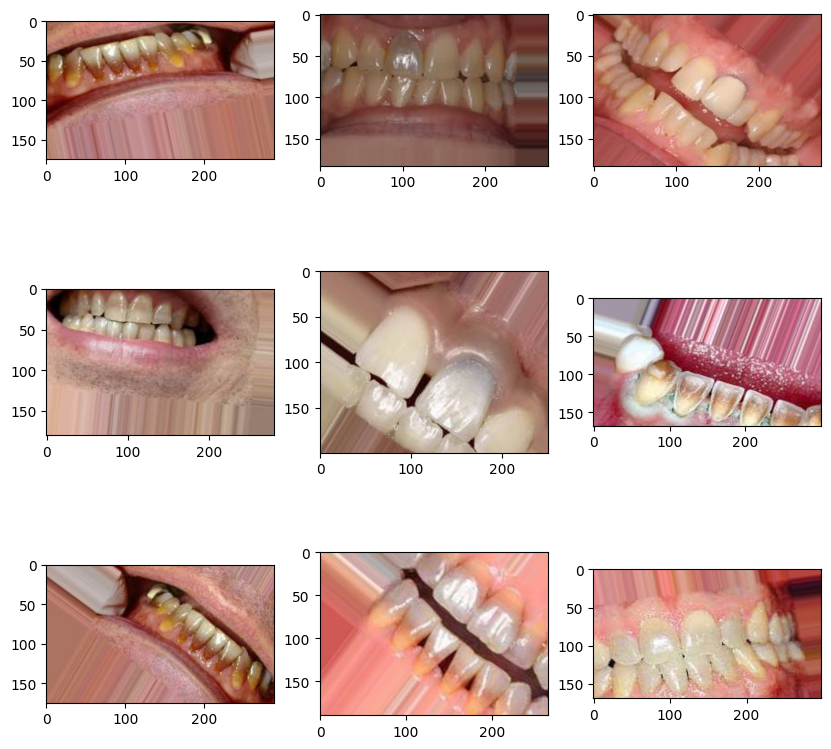

In [ ]:
visualize(tooth_discoloration_data)

### Gingivitis Data

Gingivitis is a common and mild form of gum disease (periodontal disease) that causes irritation, redness, and swelling (inflammation) of your gingiva, the part of your gum around the base of your teeth.

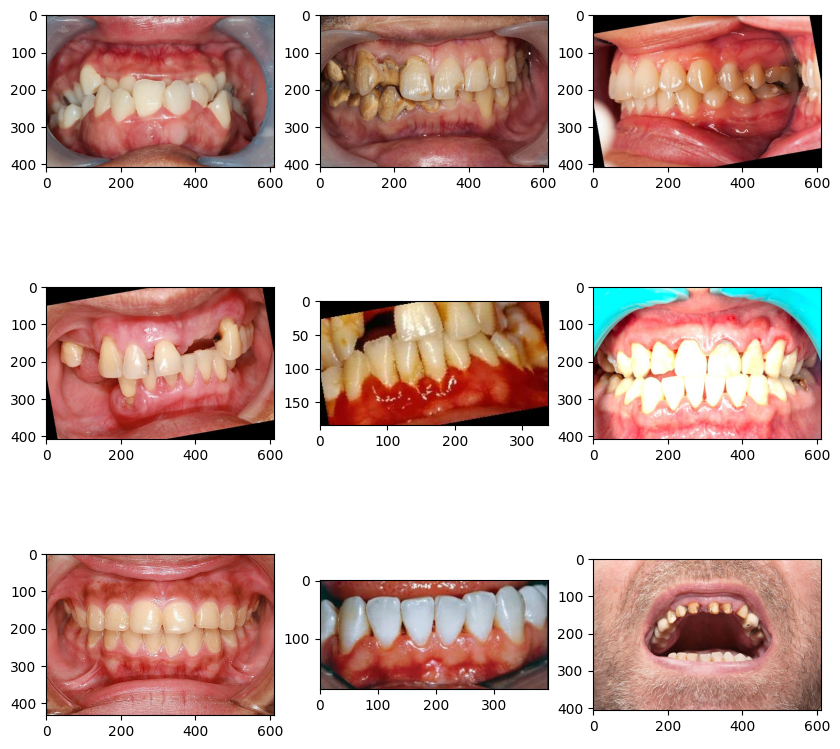

In [ ]:
visualize(gingivits_data)

## Caries Data

Dental caries or tooth decay, which is a common condition where the hard tissues of the tooth, such as enamel and dentin, are damaged by acids produced by bacteria.

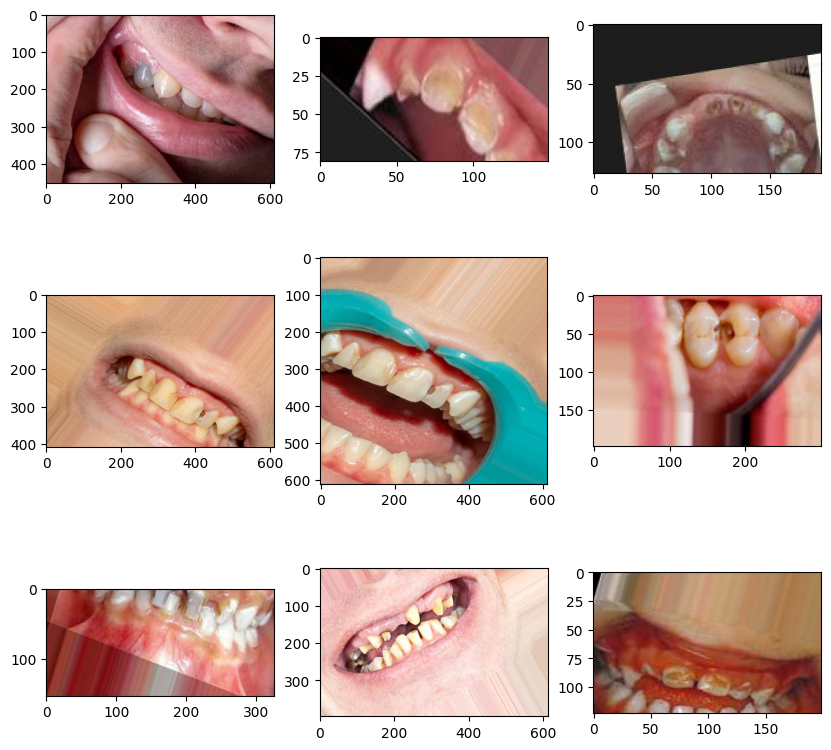

In [ ]:
visualize(caries_data)

### Calculus Data

Tooth calculus, also known as dental calculus or tartar, is a hardened deposit that forms on the teeth. It is a result of the mineralization of dental plaque, which is a soft and sticky film of bacteria that constantly forms on the teeth and gums. Dental calculus can contribute to various oral health issues and is commonly removed through professional dental cleanings.

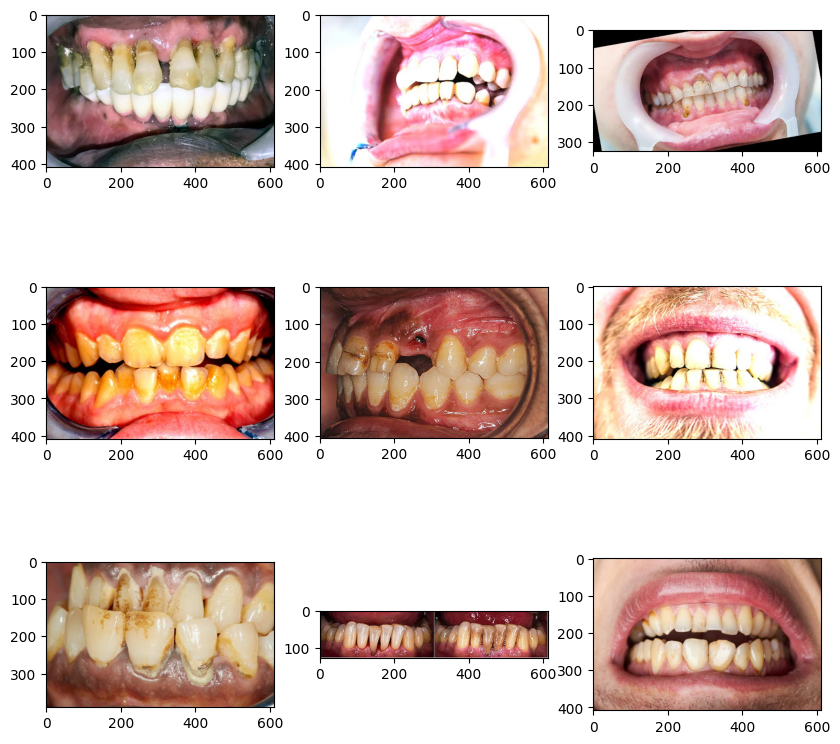

In [ ]:
visualize(calculus_data)

### Mouth Ulcer Data

A mouth ulcer, also known as a canker sore, is a painful sore or lesion that forms on the mucous membranes of the oral cavity. Mouth ulcers are a common condition and can occur on the inside of the lips, cheeks, gums, tongue, or the floor of the mouth. These sores are typically small, shallow, and may have a white or yellowish center with a red border.

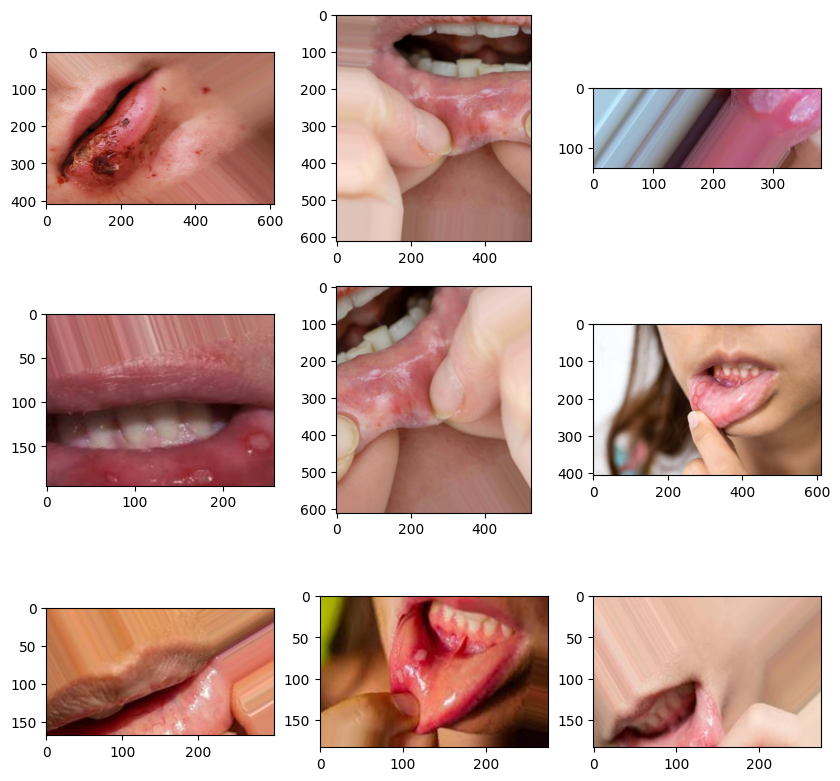

In [ ]:
visualize(mouth_ulcer_data)

### Hypodontia

Hypodontia is a dental condition characterized by the developmental absence of one or more teeth, excluding the third molars (wisdom teeth). In individuals with hypodontia, certain permanent teeth fail to develop or do not fully emerge in the oral cavity.

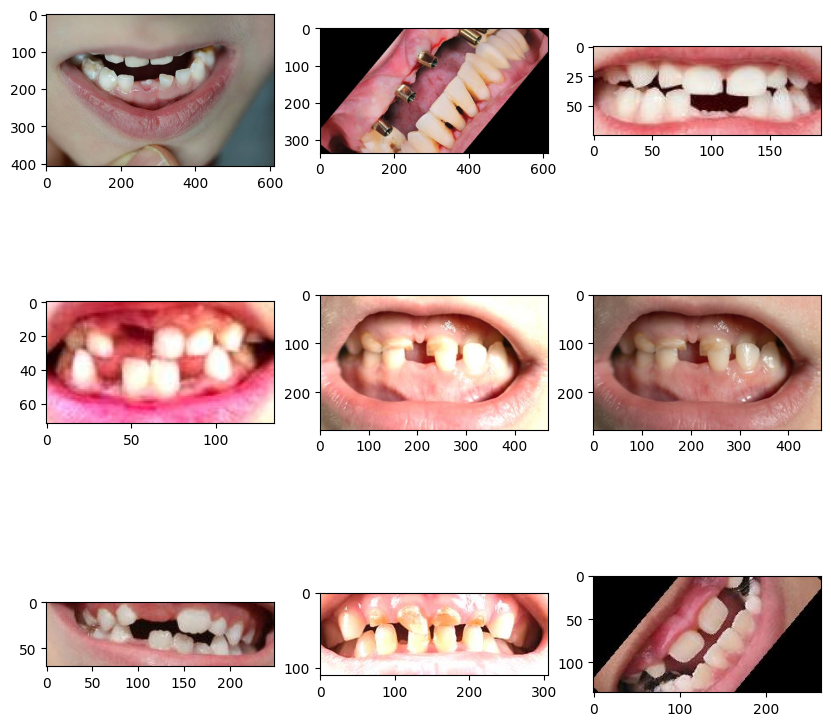

In [ ]:
visualize(hypodontia_data)

In [127]:
plt.imread(hypodontia_data[0]).shape

(183, 346, 3)

In [128]:
plt.imread(hypodontia_data[122]).shape

(405, 612, 3)

## Creating Classification Model

In [135]:
model=Sequential()

In [137]:
model.add(ResNet50(model.add(ResNet50(include_top = False, weights="imagenet",classes=6,input_shape=(224,224,3)))))

ValueError: ignored

In [139]:
model.add(Dense(6, activation = "softmax"))

In [141]:
model.layers[0].trainable = False

In [142]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 dense (Dense)               (None, 7, 7, 6)           12294     
                                                                 
Total params: 23600006 (90.03 MB)
Trainable params: 12294 (48.02 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [146]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(lr = 0.01)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = '../working/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')